In [2]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv(r"C:\Users\ROSHAN\Downloads\titanic\train.csv")
test_data = pd.read_csv(r"C:\Users\ROSHAN\Downloads\titanic\test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [7]:
# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [8]:
# Fill missing Fare values in the test set with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [9]:
# Drop the Cabin column as it has too many missing values
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [10]:
# Convert categorical variables to numerical ones
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [12]:
# Exploratory Data Analysis (EDA)
# Summary statistics for numerical columns
print("Summary statistics:\n", train_data.describe())

Summary statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Sex_male  Embarked_Q  Embarked_S  
count  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.647587    0.086420    0.725028  
std      0.806057   49.693429    0.477990    0.281141    0.446751  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%     

In [14]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)


In [15]:
# Create new feature: Family Size for the combined dataset
combined_data['FamilySize'] = combined_data['SibSp'] + combined_data['Parch'] + 1

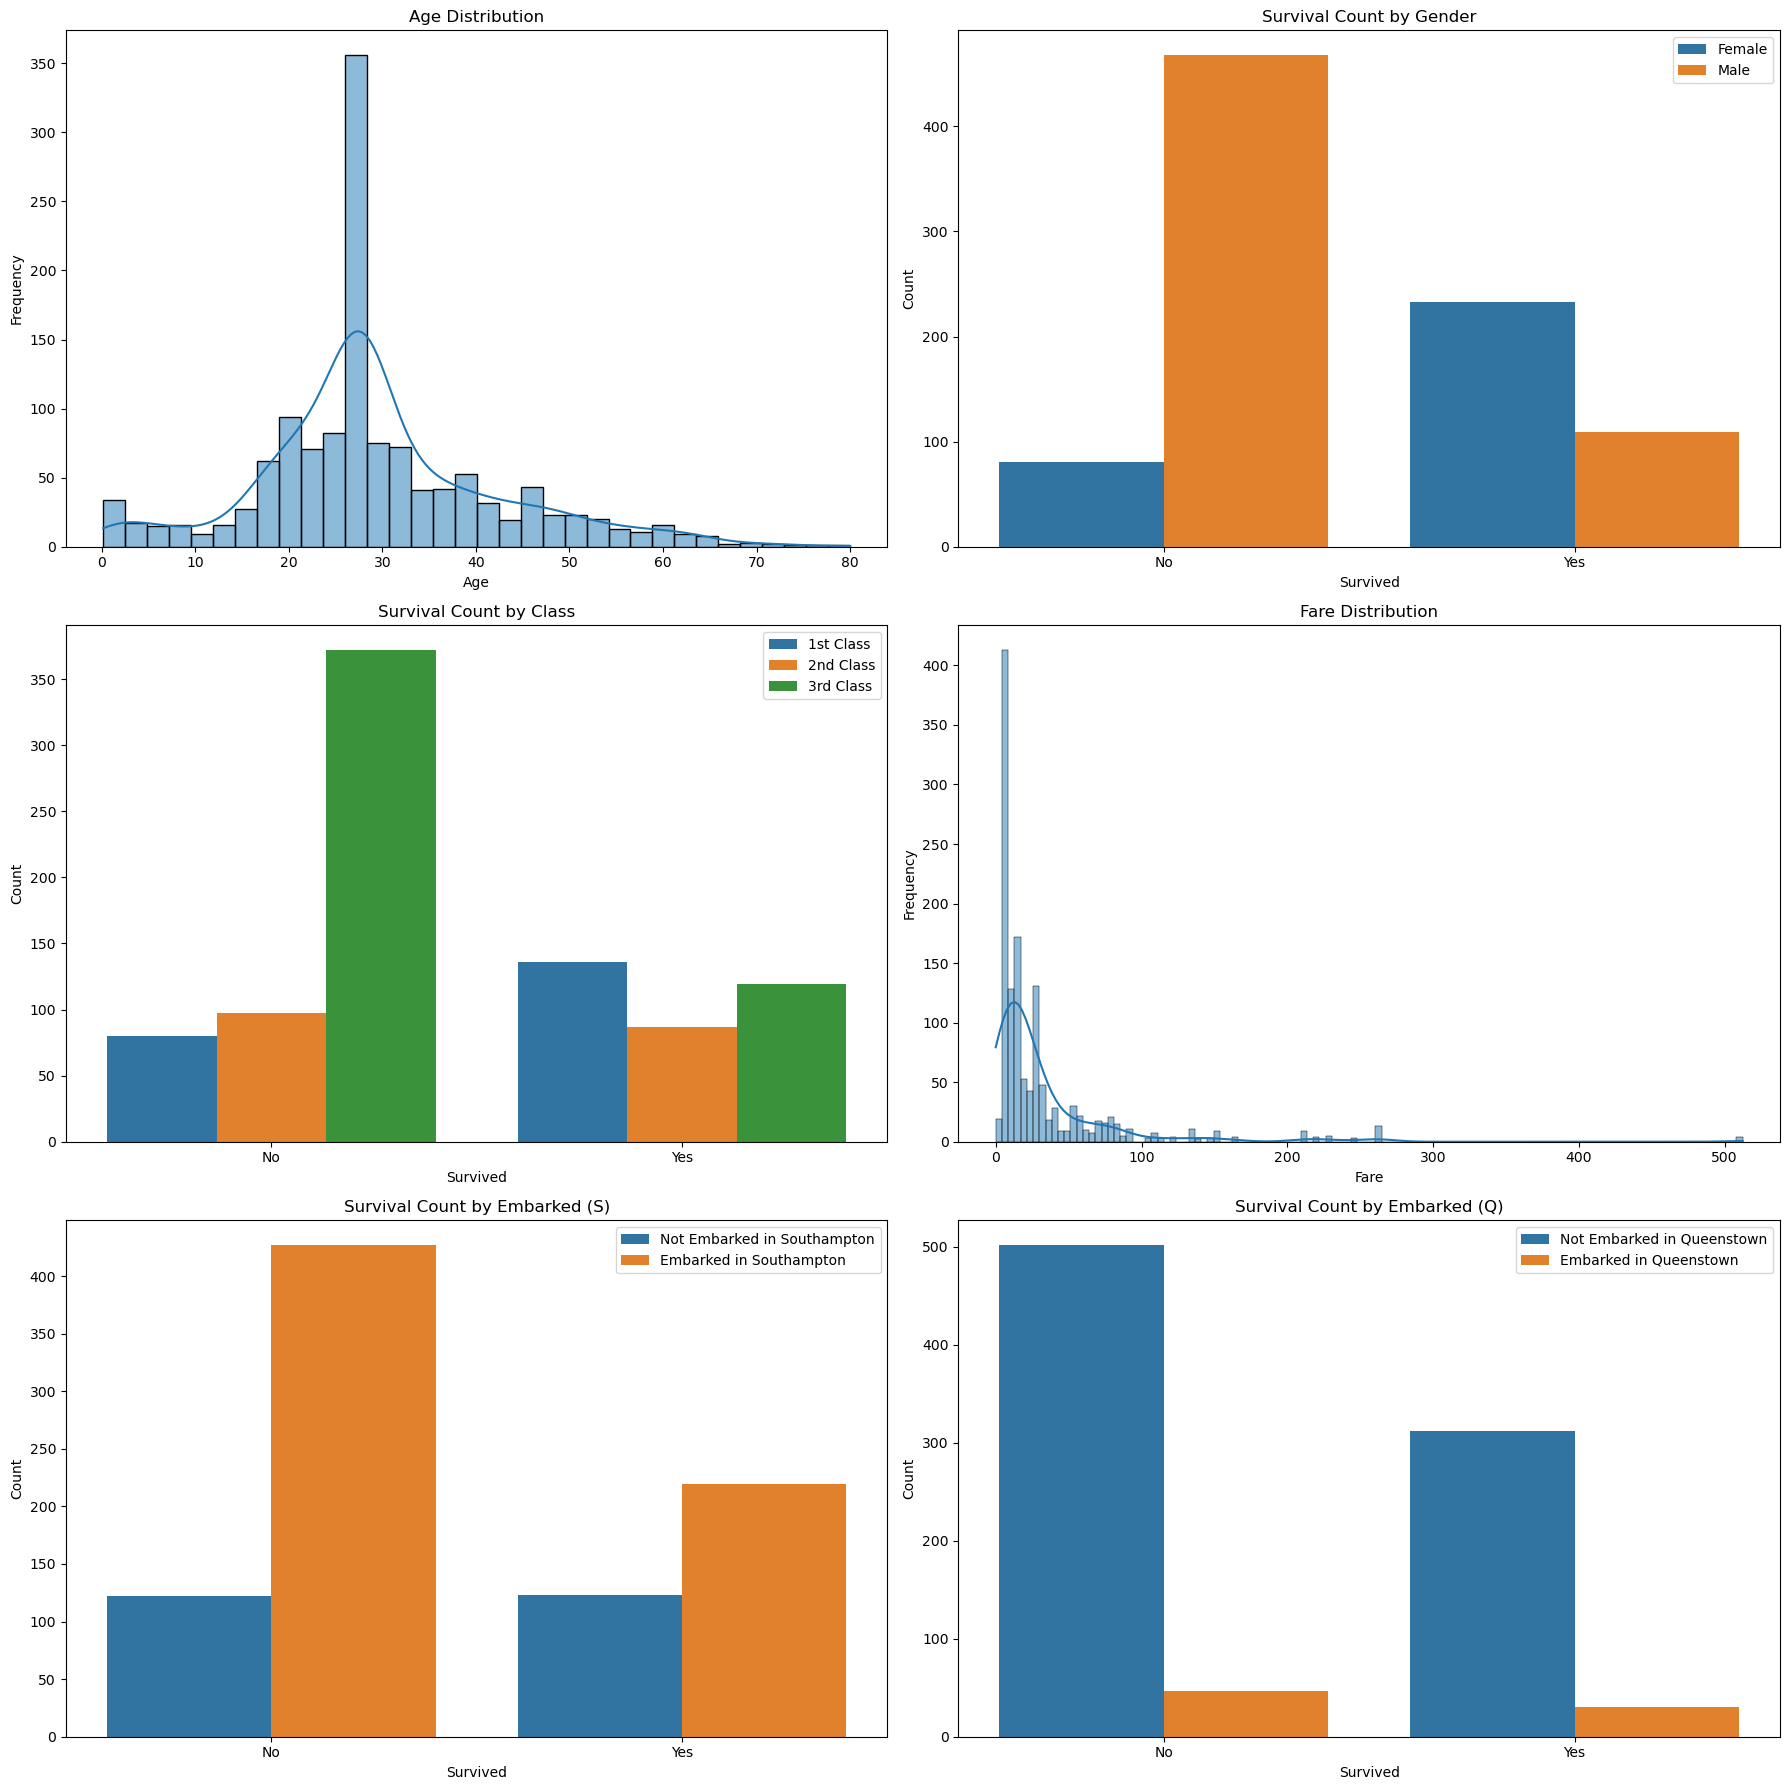

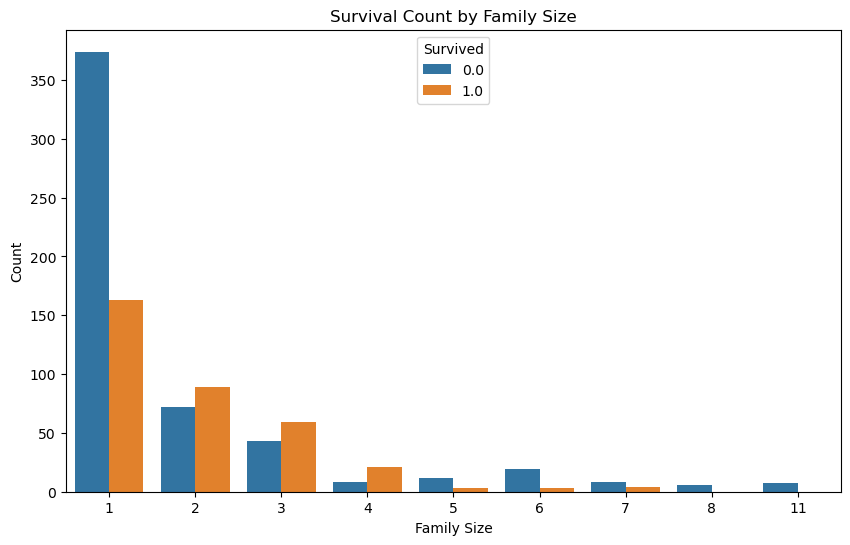

In [17]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Visualization 1: Age Distribution
sns.histplot(combined_data['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Visualization 2: Survival Count by Gender
sns.countplot(x='Survived', hue='Sex_male', data=combined_data, ax=axes[0, 1])
axes[0, 1].set_title('Survival Count by Gender')
axes[0, 1].set_xlabel('Survived')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No', 'Yes'])
axes[0, 1].legend(['Female', 'Male'])

# Visualization 3: Survival Count by Class
sns.countplot(x='Survived', hue='Pclass', data=combined_data, ax=axes[1, 0])
axes[1, 0].set_title('Survival Count by Class')
axes[1, 0].set_xlabel('Survived')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['No', 'Yes'])
axes[1, 0].legend(['1st Class', '2nd Class', '3rd Class'])

# Visualization 4: Fare Distribution
sns.histplot(combined_data['Fare'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

# Visualization 5: Survival Count by Embarked (S)
sns.countplot(x='Survived', hue='Embarked_S', data=combined_data, ax=axes[2, 0])
axes[2, 0].set_title('Survival Count by Embarked (S)')
axes[2, 0].set_xlabel('Survived')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xticklabels(['No', 'Yes'])
axes[2, 0].legend(['Not Embarked in Southampton', 'Embarked in Southampton'])

# Visualization 6: Survival Count by Embarked (Q)
sns.countplot(x='Survived', hue='Embarked_Q', data=combined_data, ax=axes[2, 1])
axes[2, 1].set_title('Survival Count by Embarked (Q)')
axes[2, 1].set_xlabel('Survived')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_xticklabels(['No', 'Yes'])
axes[2, 1].legend(['Not Embarked in Queenstown', 'Embarked in Queenstown'])

# Adjust the layout
plt.tight_layout()
plt.show()

# Visualization 7: Survival Rate by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=combined_data)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

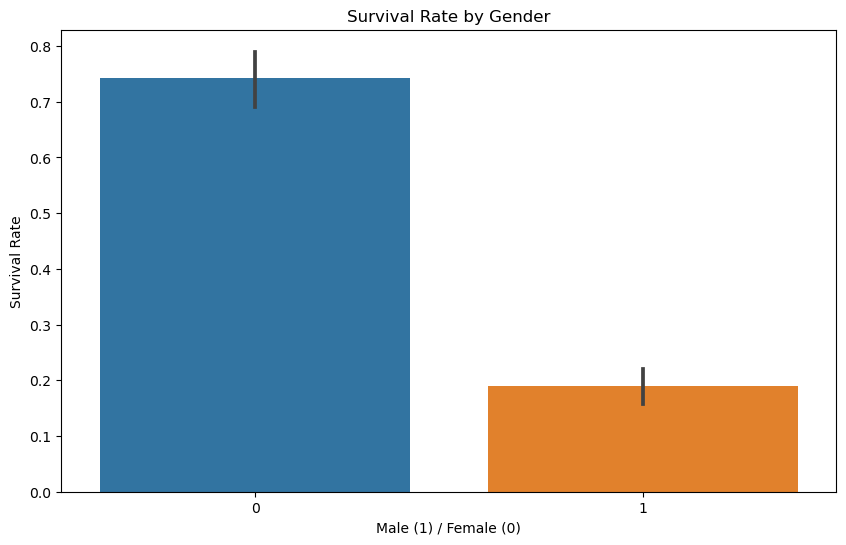

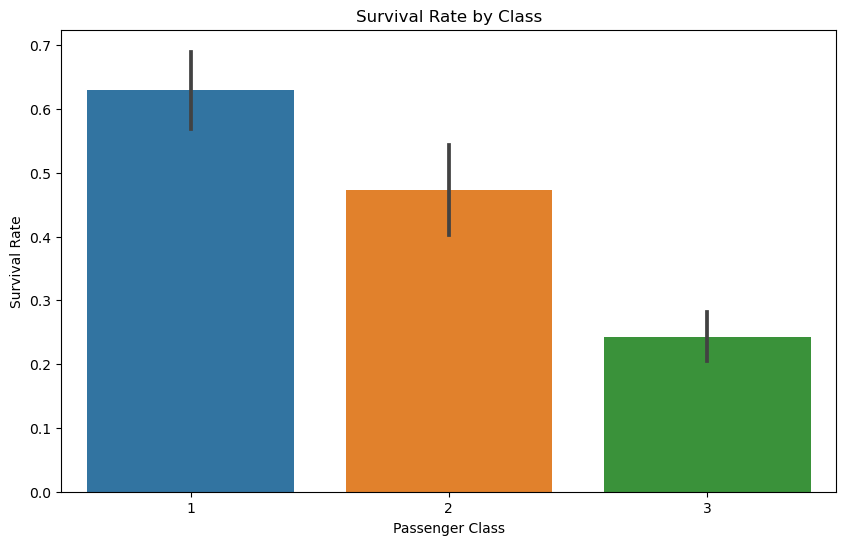

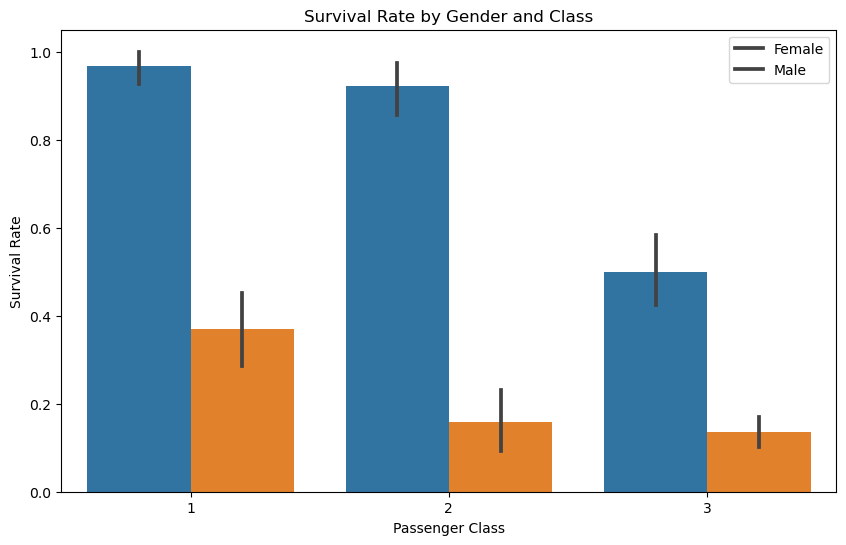

In [18]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Male (1) / Female (0)')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by gender and class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex_male', data=train_data)
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(['Female', 'Male'])
plt.show()


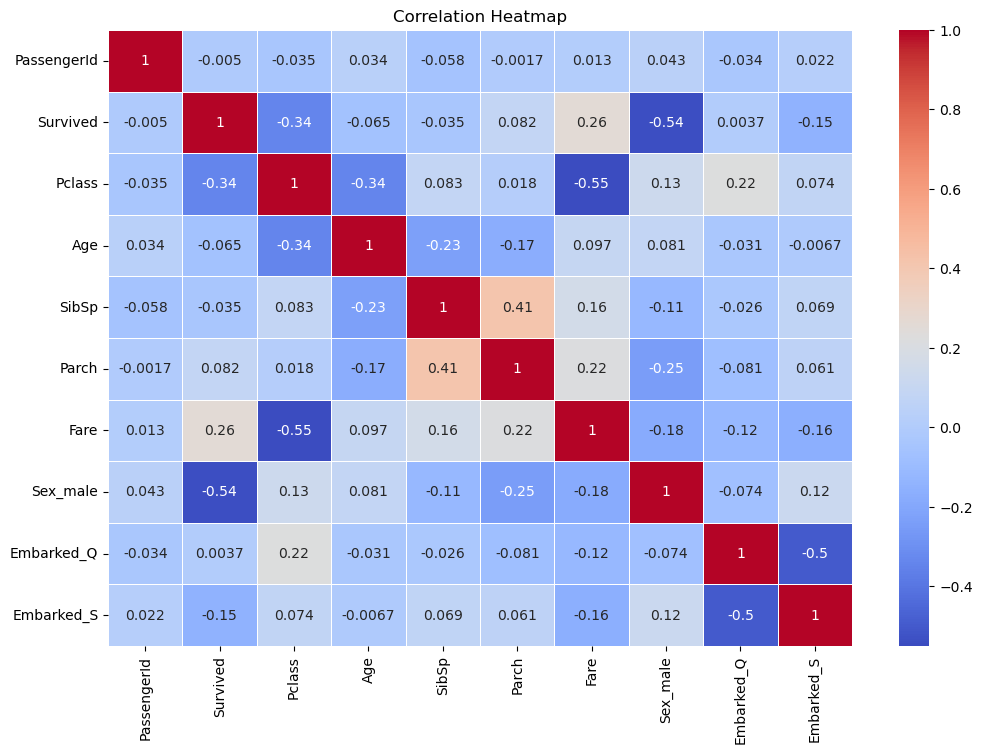

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
